In [70]:
house.price.train<-read.csv("./train_clean.csv", stringsAsFactors=FALSE)
head(house.price.train)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,⋯,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,⋯,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,⋯,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,⋯,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,⋯,0,None,None,None,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,None,IR1,Lvl,AllPub,⋯,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [71]:
train.new <- house.price.train[, c(44,45,77,78,81)]
head(train.new)

X1stFlrSF,X2ndFlrSF,MoSold,YrSold,SalePrice
856,854,2,2008,208500
1262,0,5,2007,181500
920,866,9,2008,223500
961,756,2,2006,140000
1145,1053,12,2008,250000
796,566,10,2009,143000


In [72]:
train.new$TotalArea = train.new[,1] + train.new[,2]
head(train.new)

X1stFlrSF,X2ndFlrSF,MoSold,YrSold,SalePrice,TotalArea
856,854,2,2008,208500,1710
1262,0,5,2007,181500,1262
920,866,9,2008,223500,1786
961,756,2,2006,140000,1717
1145,1053,12,2008,250000,2198
796,566,10,2009,143000,1362


In [73]:
train.new$PricePerSquare = train.new[,5] /train.new[,6]
train.new <- train.new[,c(3,4,7)]
head(train.new)

MoSold,YrSold,PricePerSquare
2,2008,121.92982
5,2007,143.81933
9,2008,125.13998
2,2006,81.53757
12,2008,113.73976
10,2009,104.99266


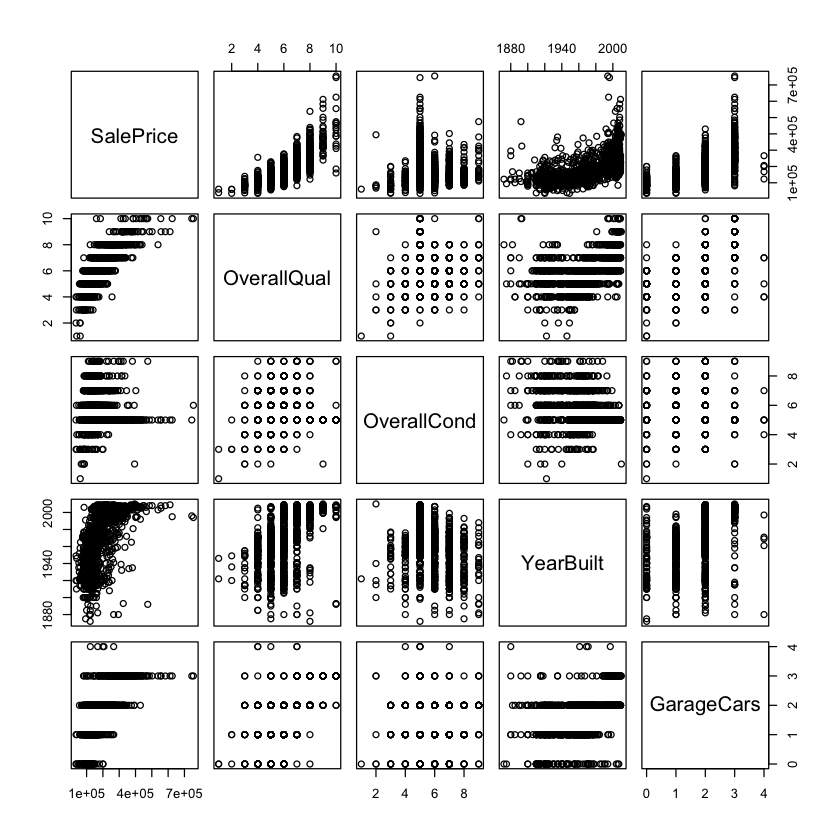

In [74]:
library(fpp2)
pairs(~SalePrice+OverallQual+OverallCond+YearBuilt+GarageCars, data=house.price.train)

In [75]:
ggplot(house.price.train$SalePrice, house.price.train$LandSlope)

ERROR: Error: Mapping should be created with `aes() or `aes_()`.


In [76]:
model1 <- lm(SalePrice ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF, data = house.price.train)
summary(model1)


Call:
lm(formula = SalePrice ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-493051  -19527   -2448   15736  285242 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.351e+05  9.044e+04  -8.128 9.29e-16 ***
OverallQual  2.056e+04  1.156e+03  17.775  < 2e-16 ***
GrLivArea    5.356e+01  3.016e+00  17.756  < 2e-16 ***
GarageCars   1.073e+04  3.061e+03   3.504 0.000472 ***
YearBuilt    3.352e+02  4.762e+01   7.038 3.00e-12 ***
GarageArea   1.651e+01  1.036e+01   1.594 0.111197    
FullBath    -5.066e+03  2.664e+03  -1.902 0.057369 .  
TotalBsmtSF  2.825e+01  2.901e+00   9.738  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38270 on 1452 degrees of freedom
Multiple R-squared:  0.7691,	Adjusted R-squared:  0.7679 
F-statistic: 690.7 on 7 and 1452 DF,  p-value: < 2.2e-16


In [77]:
house.price.train$PriceMinusMisc = house.price.train[,81] - house.price.train[,76]
model2 <- lm(PriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF, data = house.price.train)
summary(model2)


Call:
lm(formula = PriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-492878  -19500   -2428   15753  285294 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.354e+05  9.044e+04  -8.131 9.04e-16 ***
OverallQual  2.056e+04  1.156e+03  17.782  < 2e-16 ***
GrLivArea    5.353e+01  3.016e+00  17.747  < 2e-16 ***
GarageCars   1.078e+04  3.061e+03   3.522 0.000442 ***
YearBuilt    3.353e+02  4.762e+01   7.040 2.95e-12 ***
GarageArea   1.640e+01  1.036e+01   1.583 0.113590    
FullBath    -5.070e+03  2.664e+03  -1.903 0.057201 .  
TotalBsmtSF  2.826e+01  2.901e+00   9.741  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38270 on 1452 degrees of freedom
Multiple R-squared:  0.7691,	Adjusted R-squared:  0.768 
F-statistic:   691 on 7 and 1452 DF,  p-value: < 2.2e-16


In [78]:
house.price.train$LogPriceMinusMisc = log(house.price.train[,82] )
model3 <- lm(LogPriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF, data = house.price.train)
summary(model3)


Call:
lm(formula = LogPriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF, data = house.price.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.20301 -0.07312  0.01121  0.09602  0.59077 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.009e+00  4.104e-01  14.643  < 2e-16 ***
OverallQual  1.032e-01  5.247e-03  19.670  < 2e-16 ***
GrLivArea    2.427e-04  1.369e-05  17.738  < 2e-16 ***
GarageCars   7.568e-02  1.389e-02   5.449 5.94e-08 ***
YearBuilt    2.406e-03  2.161e-04  11.132  < 2e-16 ***
GarageArea   5.258e-05  4.699e-05   1.119    0.263    
FullBath    -6.259e-03  1.209e-02  -0.518    0.605    
TotalBsmtSF  1.197e-04  1.316e-05   9.096  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1736 on 1452 degrees of freedom
Multiple R-squared:  0.8121,	Adjusted R-squared:  0.8112 
F-statistic: 896.8 on 7 and 1452 DF,  p-va

[1] 0.7086245

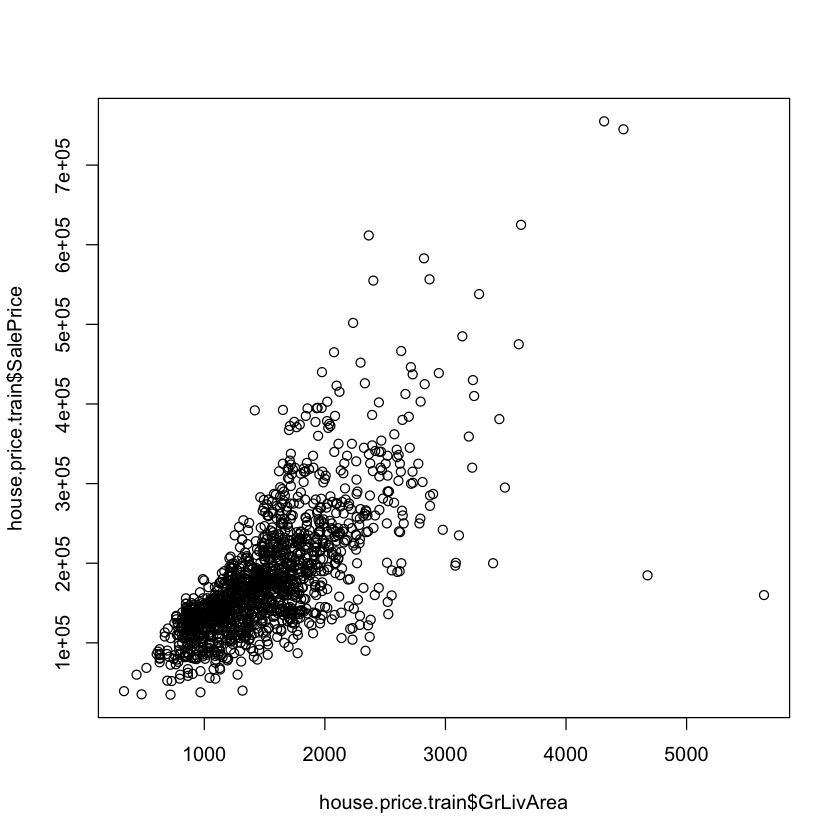

In [79]:
plot(house.price.train$GrLivArea, house.price.train$SalePrice)
cor(house.price.train$GrLivArea, house.price.train$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334    1130    1464    1515    1777    5642 

[1] 0.7349682

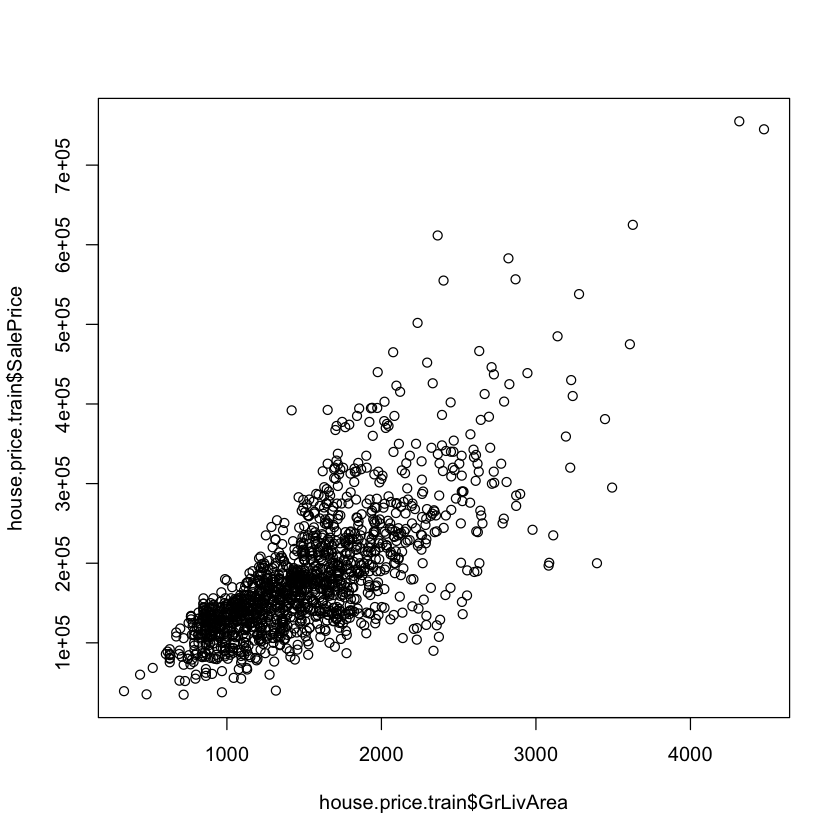

In [80]:
summary(house.price.train$GrLivArea)
house.price.train <- subset(house.price.train, GrLivArea < 4600)   # Delete outliers
#head(house.price.train)
plot(house.price.train$GrLivArea, house.price.train$SalePrice)
cor(house.price.train$GrLivArea, house.price.train$SalePrice)

In [81]:
model4 <- lm(LogPriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF, data = house.price.train)
summary(model4)


Call:
lm(formula = LogPriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF, data = house.price.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92148 -0.07552  0.00726  0.09194  0.53760 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.462e+00  3.686e-01  14.820  < 2e-16 ***
OverallQual  9.373e-02  4.726e-03  19.836  < 2e-16 ***
GrLivArea    2.987e-04  1.260e-05  23.699  < 2e-16 ***
GarageCars   3.496e-02  1.267e-02   2.760 0.005861 ** 
YearBuilt    2.672e-03  1.940e-04  13.772  < 2e-16 ***
GarageArea   1.455e-04  4.252e-05   3.421 0.000641 ***
FullBath    -2.902e-02  1.089e-02  -2.665 0.007794 ** 
TotalBsmtSF  1.783e-04  1.221e-05  14.599  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1555 on 1450 degrees of freedom
Multiple R-squared:  0.8496,	Adjusted R-squared:  0.8489 
F-statistic:  1170 on 7 and 1450 DF,  p-va

[1] 0.6511529

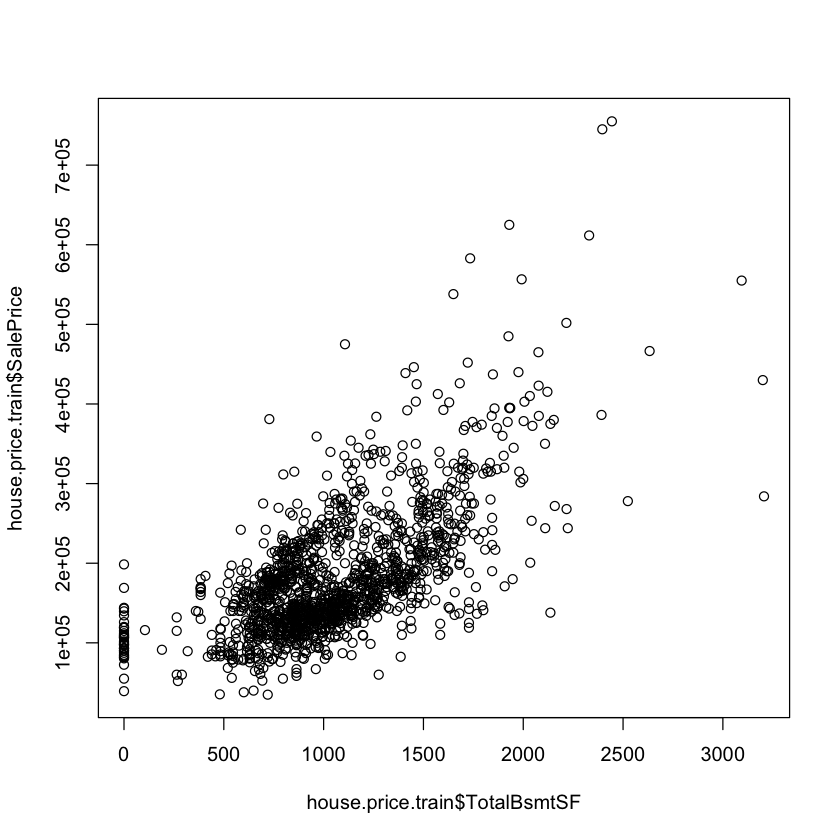

In [82]:
plot(house.price.train$TotalBsmtSF, house.price.train$SalePrice)
cor(house.price.train$TotalBsmtSF, house.price.train$SalePrice)


Call:
lm(formula = SalePrice ~ Fence, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-152312  -49998  -13251   29240  596249 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   178928      10177  17.581  < 2e-16 ***
FenceGdWo     -38548      14722  -2.618  0.00893 ** 
FenceMnPrv    -30176      11937  -2.528  0.01158 *  
FenceMnWw     -44641      25673  -1.739  0.08228 .  
FenceNone       8695      10429   0.834  0.40456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78170 on 1453 degrees of freedom
Multiple R-squared:  0.03565,	Adjusted R-squared:  0.033 
F-statistic: 13.43 on 4 and 1453 DF,  p-value: 9.461e-11


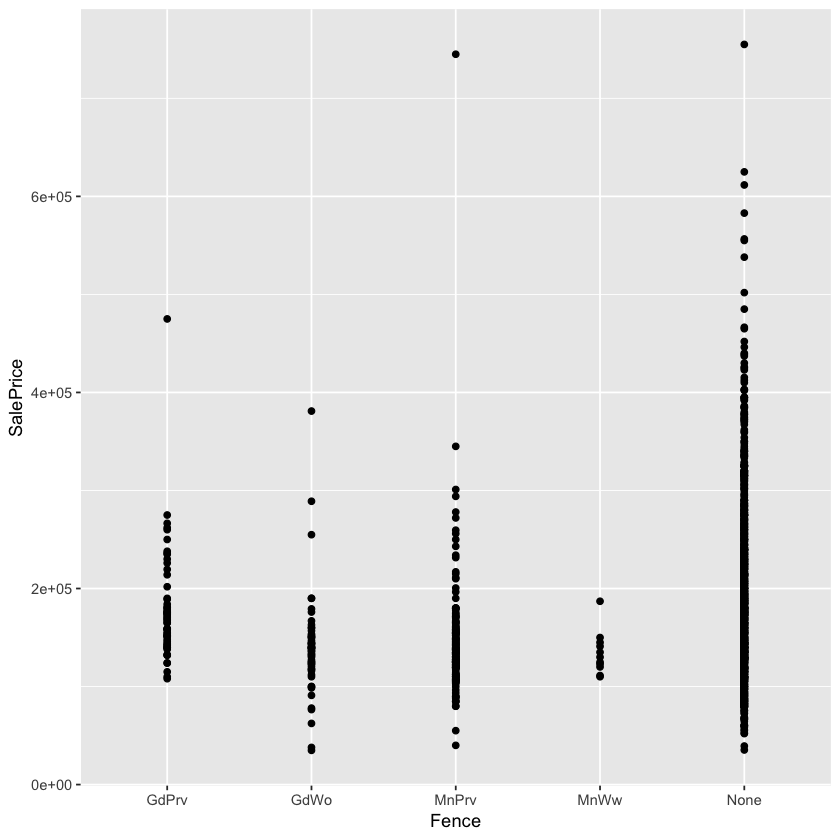

In [99]:
#house.price.train$Fence[house.price.train$Fence=="0"] <- 'None'
#levels(house.price.train$Fence)[levels(house.price.train$Fence)=='None'] <- '0'
#within(house.price.train, levels(Fence)[levels(Fence) == 'None'] <- "b")
#house.price.train$Fence[house.price.train$Fence=="MnWw"] <- 1
#house.price.train$Fence
model.Fence <- lm(SalePrice~Fence, data=house.price.train)
summary(model.Fence)
library(ggplot2)
ggplot(house.price.train, aes(Fence, SalePrice)) + geom_point()

In [100]:
house.price.train$Fence2 = house.price.train$Fence

In [101]:
house.price.train$Fence[house.price.train$Fence=="GdPrv"] <- 2
house.price.train$Fence[house.price.train$Fence=="MnPrv"] <- 1
house.price.train$Fence[house.price.train$Fence=="GdWo"] <- 0
house.price.train$Fence[house.price.train$Fence=="MnWw"] <- 0
house.price.train$Fence[house.price.train$Fence=="None"] <- 0

In [102]:
house.price.train$Fence <- as.numeric(as.character(house.price.train$Fence))
head(house.price.train$Fence)

[1] 0 0 0 0 0 1


Call:
lm(formula = SalePrice ~ Fence, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-148957  -49929  -15857   31143  576648 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   183857       2225  82.619  < 2e-16 ***
Fence         -15505       4286  -3.617 0.000308 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 79170 on 1456 degrees of freedom
Multiple R-squared:  0.008907,	Adjusted R-squared:  0.008226 
F-statistic: 13.08 on 1 and 1456 DF,  p-value: 0.0003079


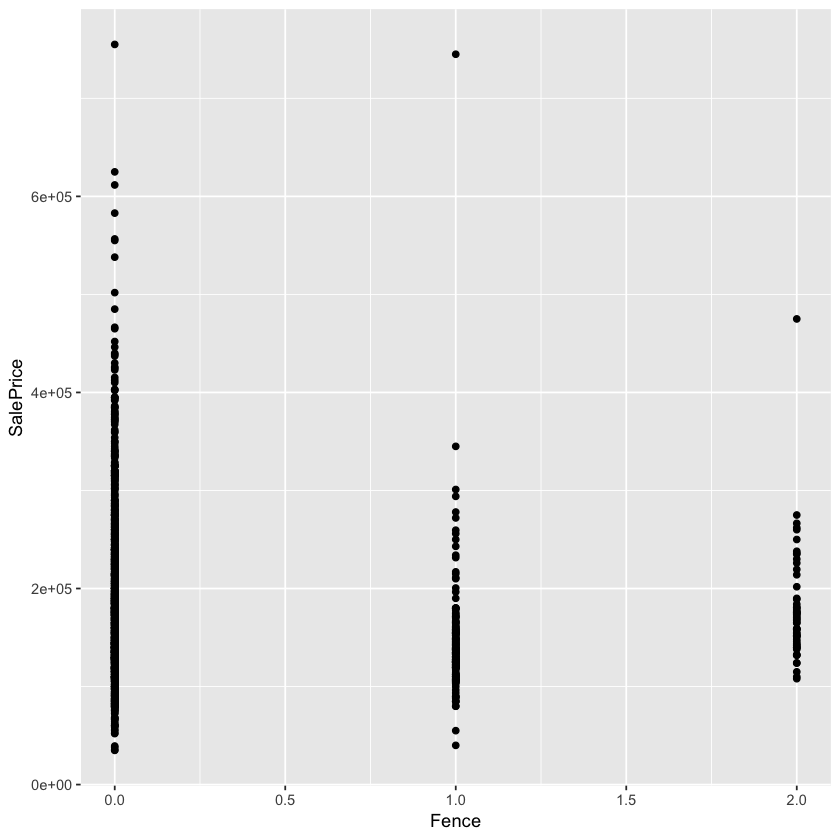

In [103]:
model.FenceNew <- lm(SalePrice~Fence, data=house.price.train)
summary(model.FenceNew)
ggplot(house.price.train, aes(Fence, SalePrice)) + geom_point()

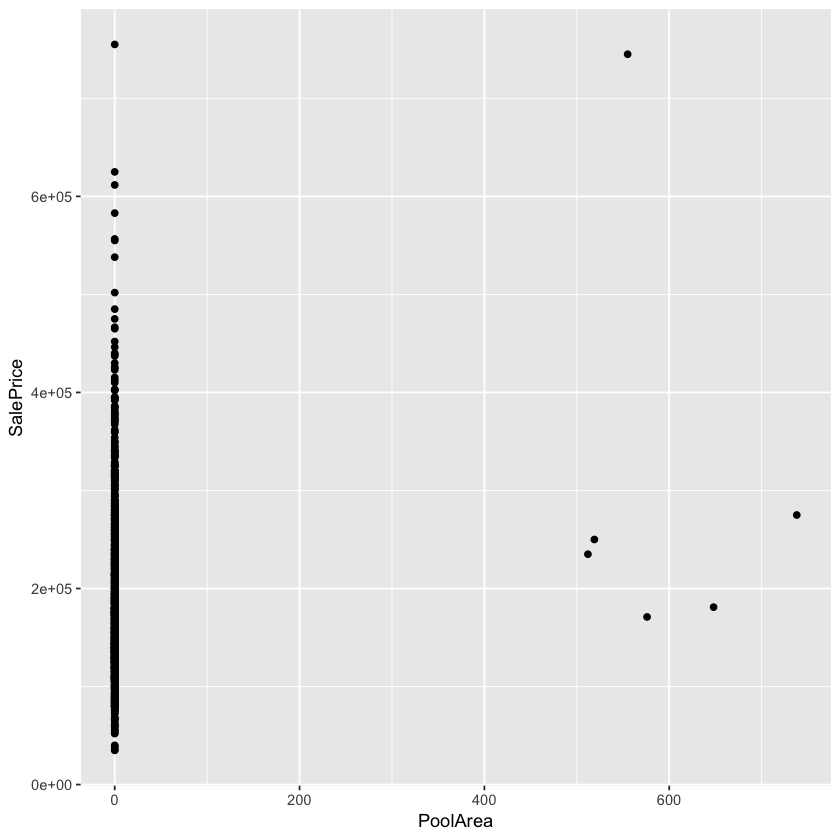

In [104]:
ggplot(house.price.train, aes(PoolArea, SalePrice)) + geom_point()

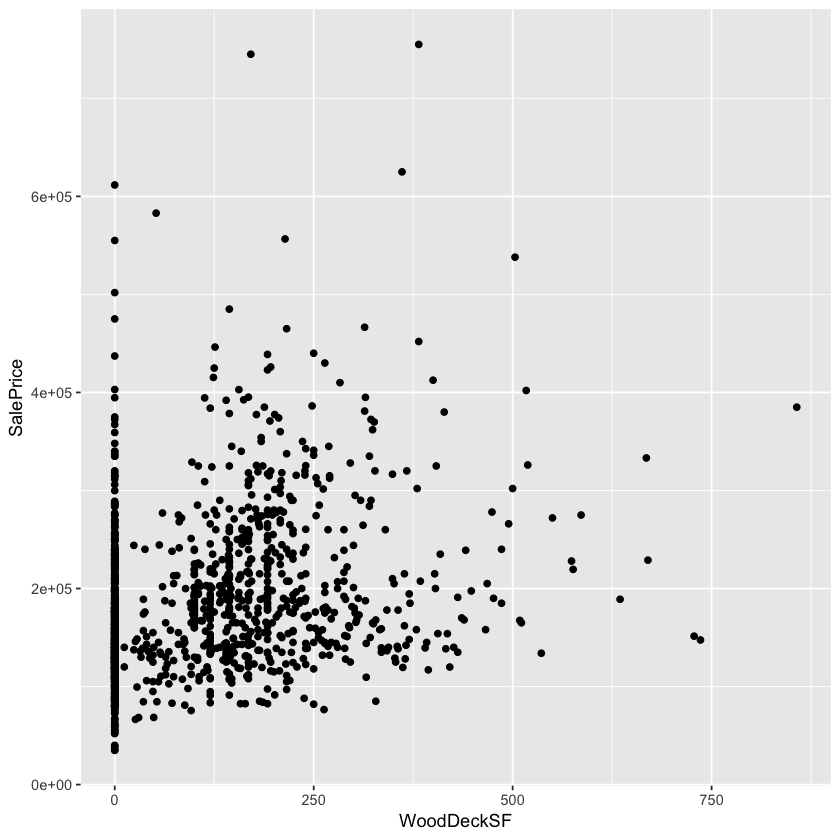

In [105]:
ggplot(house.price.train, aes(WoodDeckSF, SalePrice)) + geom_point()

In [106]:
model.WoodDeckSF <- lm(SalePrice~WoodDeckSF, data=house.price.train)
summary(model.WoodDeckSF)


Call:
lm(formula = SalePrice ~ WoodDeckSF, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-165640  -46939  -14879   30030  548226 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 161555.65    2463.15   65.59   <2e-16 ***
WoodDeckSF     205.96      15.72   13.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 75210 on 1456 degrees of freedom
Multiple R-squared:  0.1055,	Adjusted R-squared:  0.1049 
F-statistic: 171.7 on 1 and 1456 DF,  p-value: < 2.2e-16


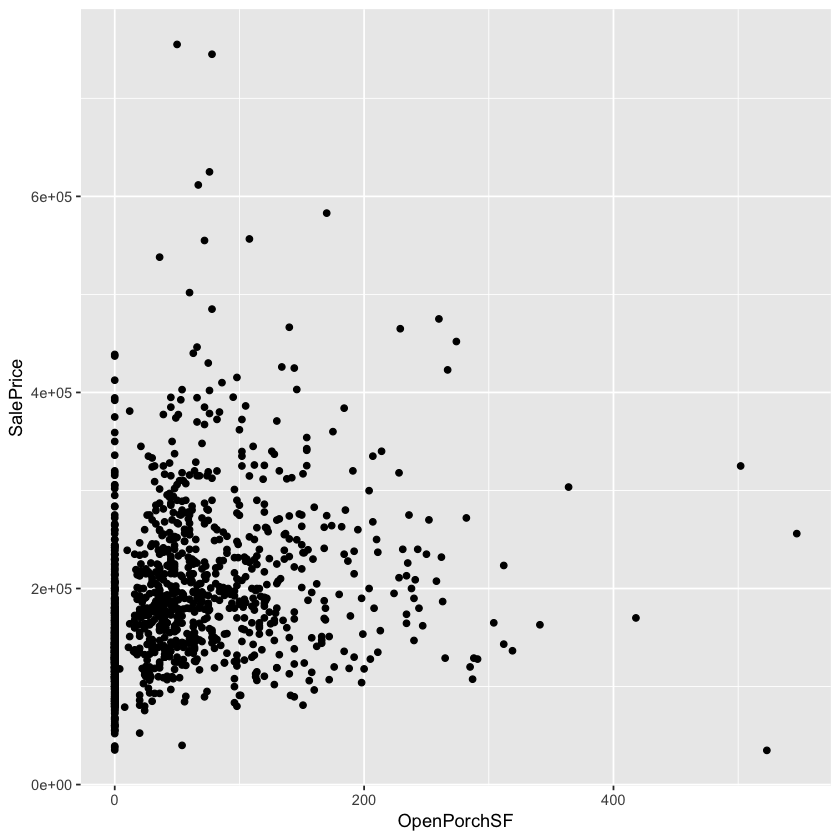

In [107]:
ggplot(house.price.train, aes(OpenPorchSF, SalePrice)) + geom_point()

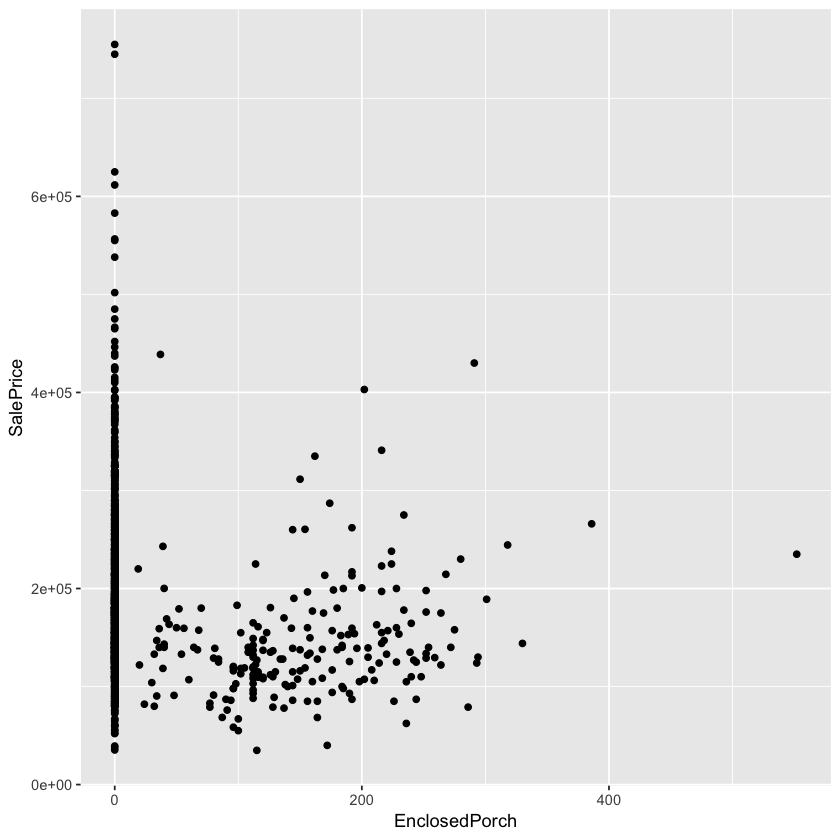

In [108]:
ggplot(house.price.train, aes(EnclosedPorch, SalePrice)) + geom_point()

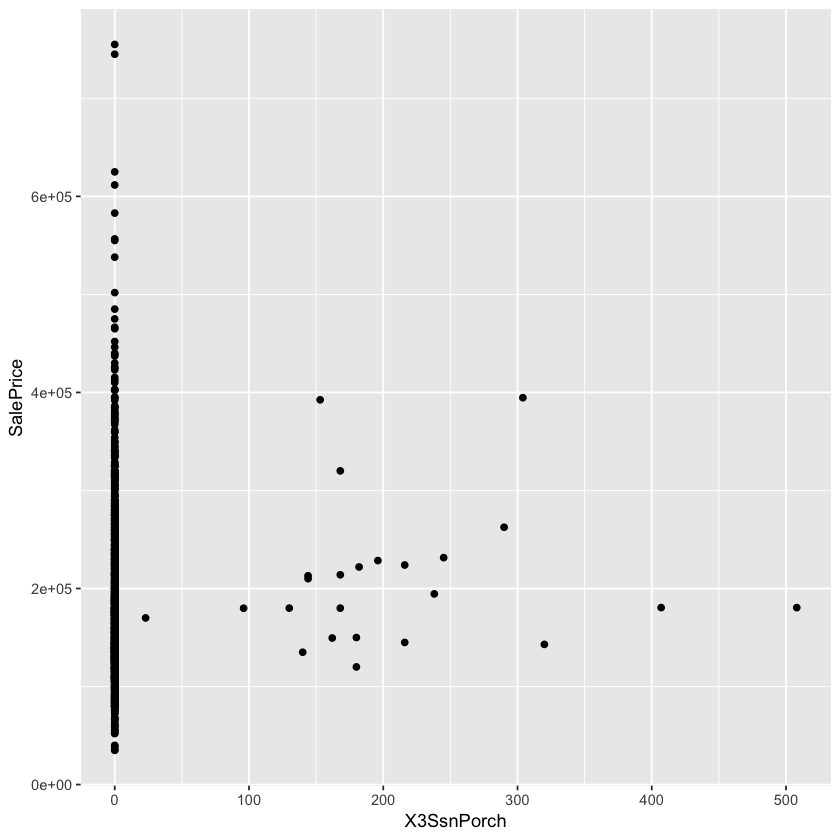

In [112]:
ggplot(house.price.train, aes(X3SsnPorch, SalePrice)) + geom_point()

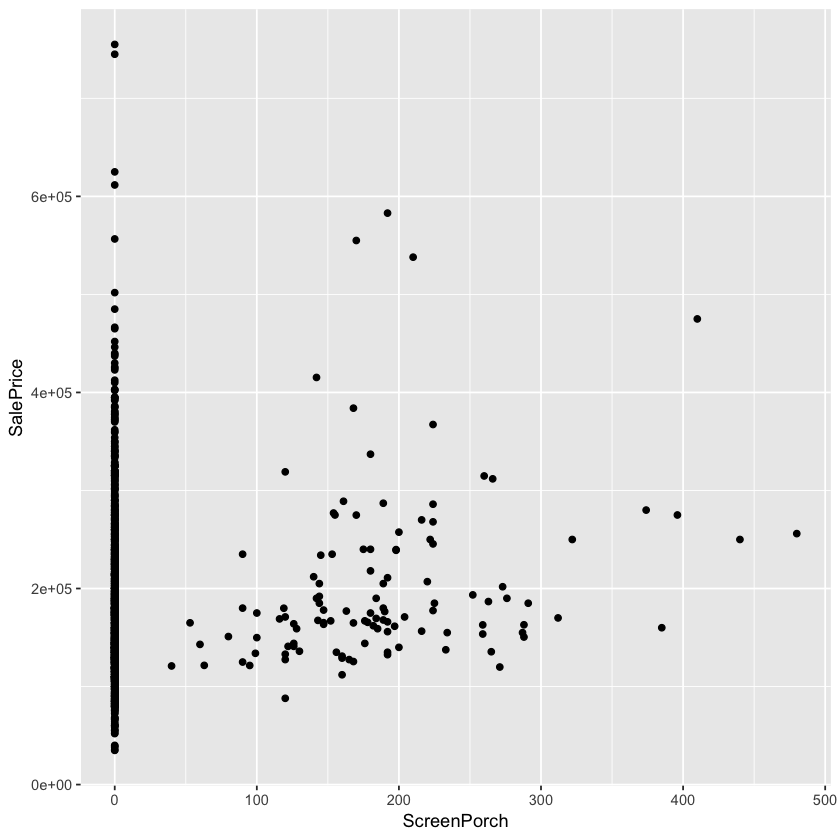

In [113]:
ggplot(house.price.train, aes(ScreenPorch, SalePrice)) + geom_point()

In [114]:
house.price.train$PorchDeckArea = house.price.train$WoodDeckSF + house.price.train$OpenPorchSF + house.price.train$EnclosedPorch + house.price.train$X3SsnPorch + house.price.train$ScreenPorch


In [115]:
model.PorchDeckArea <- lm(SalePrice~PorchDeckArea, data=house.price.train)
summary(model.PorchDeckArea)


Call:
lm(formula = SalePrice ~ PorchDeckArea, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-237498  -46162  -12260   29113  550425 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   144760.27    2930.99   49.39   <2e-16 ***
PorchDeckArea    200.06      12.27   16.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73130 on 1456 degrees of freedom
Multiple R-squared:  0.1544,	Adjusted R-squared:  0.1538 
F-statistic: 265.8 on 1 and 1456 DF,  p-value: < 2.2e-16


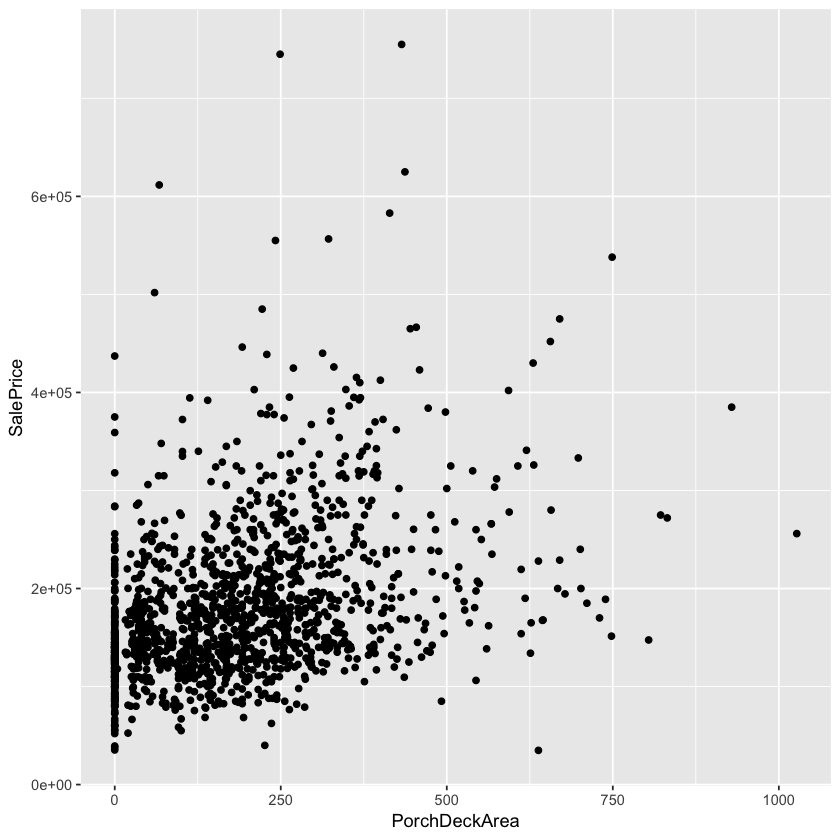

In [116]:
ggplot(house.price.train, aes(PorchDeckArea, SalePrice)) + geom_point()


Call:
lm(formula = SalePrice ~ PorchDeckAreaNew, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-302400  -44865  -11482   27729  531930 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      141981.58    2871.18   49.45   <2e-16 ***
PorchDeckAreaNew    336.47      18.72   17.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 71940 on 1456 degrees of freedom
Multiple R-squared:  0.1817,	Adjusted R-squared:  0.1811 
F-statistic: 323.2 on 1 and 1456 DF,  p-value: < 2.2e-16


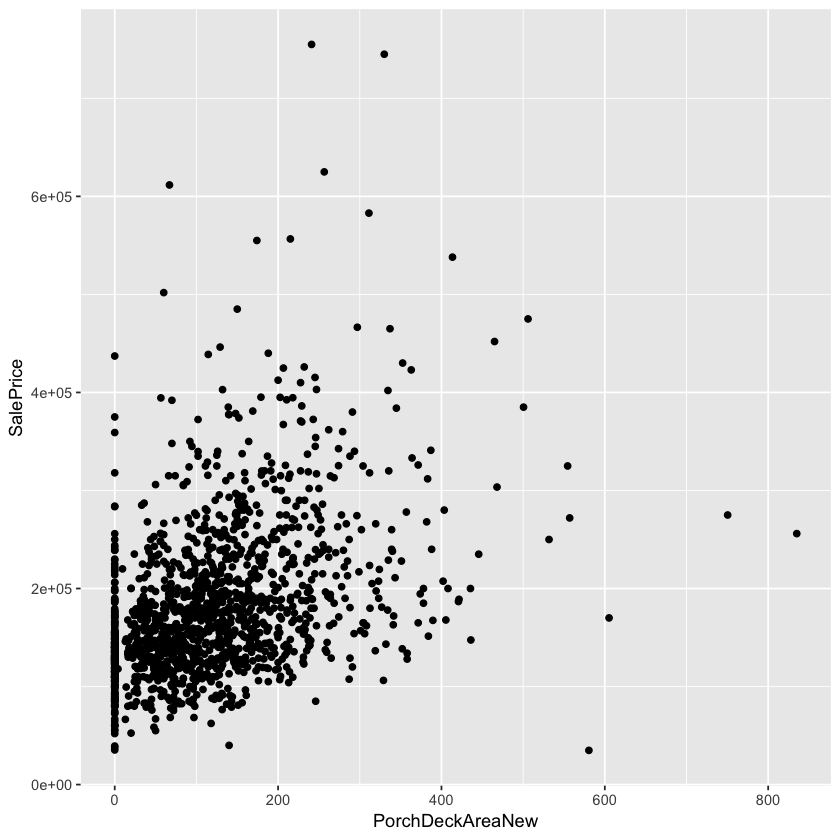

In [120]:
house.price.train$PorchDeckAreaNew = 0.5*house.price.train$WoodDeckSF + house.price.train$OpenPorchSF + 0.5*house.price.train$EnclosedPorch + 0.5*house.price.train$X3SsnPorch + 0.6*house.price.train$ScreenPorch + 0.3*house.price.train$PoolArea
model.PorchDeckAreaNew <- lm(SalePrice~PorchDeckAreaNew, data=house.price.train)
summary(model.PorchDeckAreaNew)
ggplot(house.price.train, aes(PorchDeckAreaNew, SalePrice)) + geom_point()

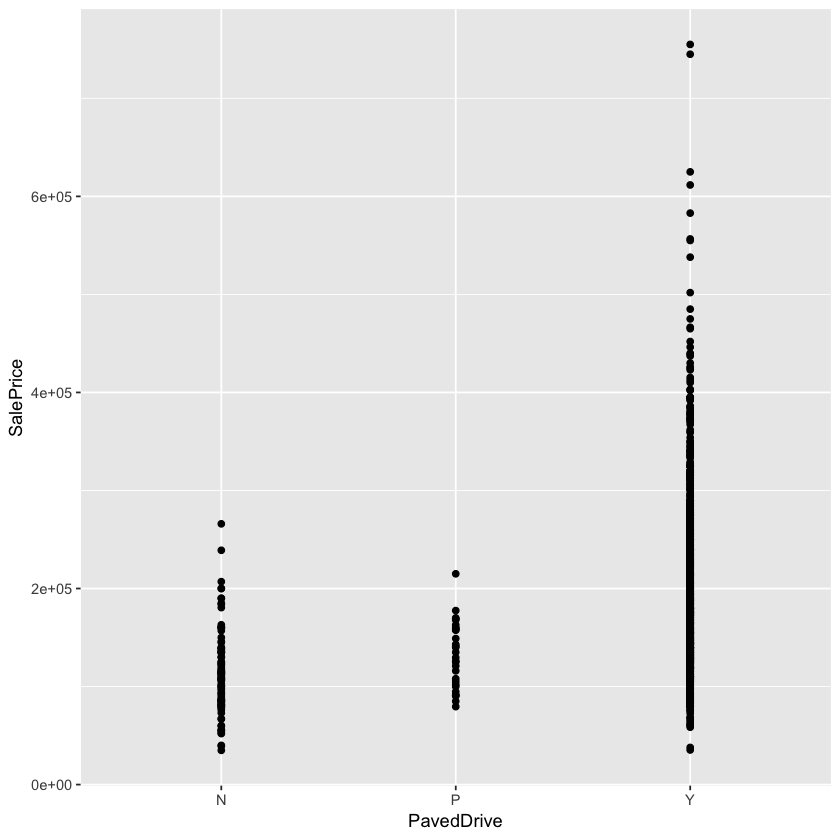

In [118]:
ggplot(house.price.train, aes(PavedDrive, SalePrice)) + geom_point()


Call:
lm(formula = SalePrice ~ PavedDrive2, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-151144  -51455  -15955   33045  568545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   186455       2115  88.172   <2e-16 ***
PavedDrive2   -67093       7371  -9.102   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 77350 on 1456 degrees of freedom
Multiple R-squared:  0.05384,	Adjusted R-squared:  0.05319 
F-statistic: 82.85 on 1 and 1456 DF,  p-value: < 2.2e-16


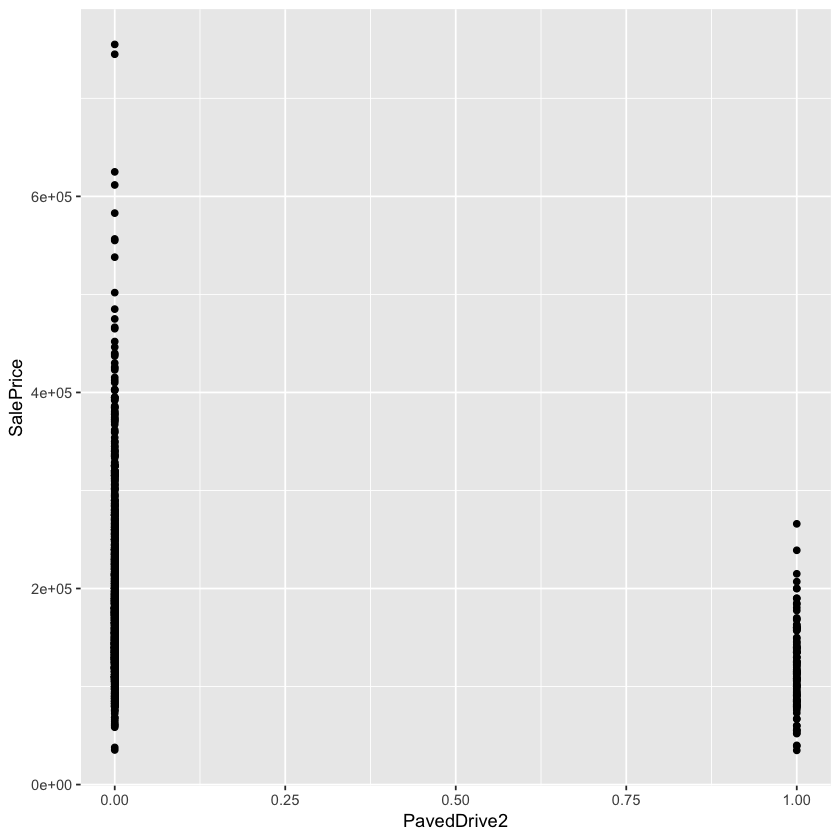

In [119]:
house.price.train$PavedDrive2 = house.price.train$PavedDrive
house.price.train$PavedDrive2[house.price.train$PavedDrive2=="N"] <- 1
house.price.train$PavedDrive2[house.price.train$PavedDrive2=="P"] <- 1
house.price.train$PavedDrive2[house.price.train$PavedDrive2=="Y"] <- 0
house.price.train$PavedDrive2 <- as.numeric(as.character(house.price.train$PavedDrive2))
model.PavedDrive2 <- lm(SalePrice~PavedDrive2, data=house.price.train)
summary(model.PavedDrive2)
ggplot(house.price.train, aes(PavedDrive2, SalePrice)) + geom_point()

In [121]:
model5 <- lm(LogPriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew, data = house.price.train)
summary(model5)


Call:
lm(formula = LogPriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew, 
    data = house.price.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97694 -0.07568  0.01193  0.08857  0.55198 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.392e+00  3.635e-01  14.833  < 2e-16 ***
OverallQual       9.108e-02  4.677e-03  19.477  < 2e-16 ***
GrLivArea         2.814e-04  1.270e-05  22.153  < 2e-16 ***
GarageCars        3.838e-02  1.250e-02   3.070  0.00218 ** 
YearBuilt         2.716e-03  1.914e-04  14.190  < 2e-16 ***
GarageArea        1.279e-04  4.201e-05   3.045  0.00237 ** 
FullBath         -2.721e-02  1.074e-02  -2.533  0.01140 *  
TotalBsmtSF       1.701e-04  1.211e-05  14.055  < 2e-16 ***
PorchDeckAreaNew  2.908e-04  4.449e-05   6.536 8.71e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.153

In [122]:
model6 <- lm(LogPriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + X1stFlrSF, data = house.price.train)
summary(model6)


Call:
lm(formula = LogPriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + 
    X1stFlrSF, data = house.price.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97498 -0.07721  0.01285  0.08894  0.54827 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.319e+00  3.646e-01  14.588  < 2e-16 ***
OverallQual       9.226e-02  4.703e-03  19.619  < 2e-16 ***
GrLivArea         2.735e-04  1.321e-05  20.709  < 2e-16 ***
GarageCars        3.840e-02  1.249e-02   3.075  0.00214 ** 
YearBuilt         2.747e-03  1.917e-04  14.330  < 2e-16 ***
GarageArea        1.209e-04  4.208e-05   2.872  0.00413 ** 
FullBath         -2.819e-02  1.074e-02  -2.625  0.00875 ** 
TotalBsmtSF       1.420e-04  1.781e-05   7.976 3.05e-15 ***
PorchDeckAreaNew  2.941e-04  4.446e-05   6.614 5.23e-11 ***
X1stFlrSF         4.292e-05  1.995e-05   2.151  0.03164 *  
---
Signif. codes:  0 ‘***

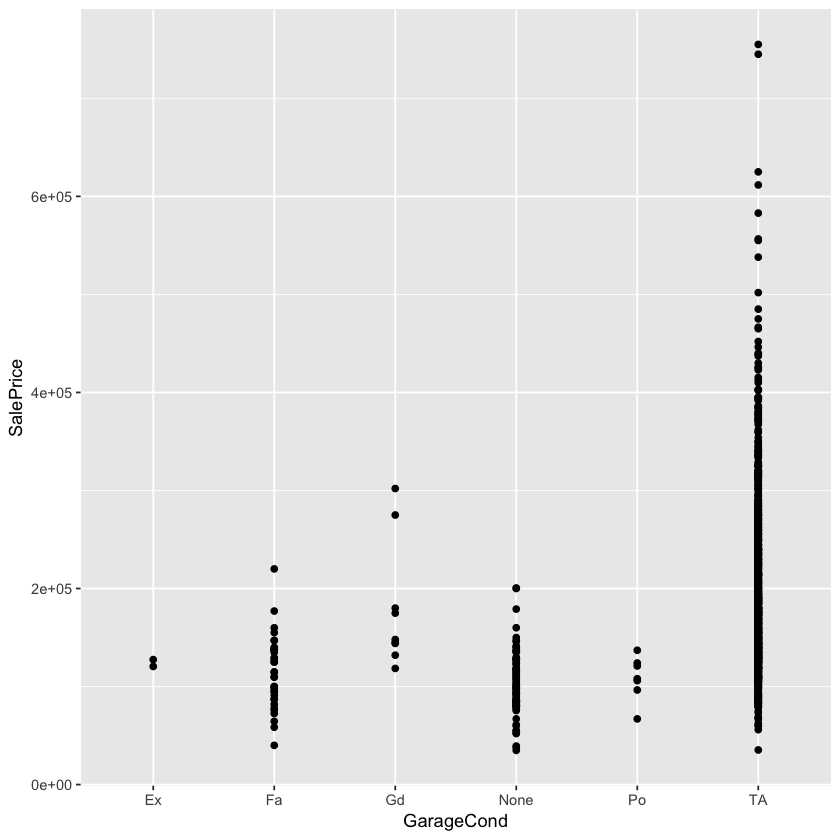

In [123]:
ggplot(house.price.train, aes(GarageCond, SalePrice)) + geom_point()

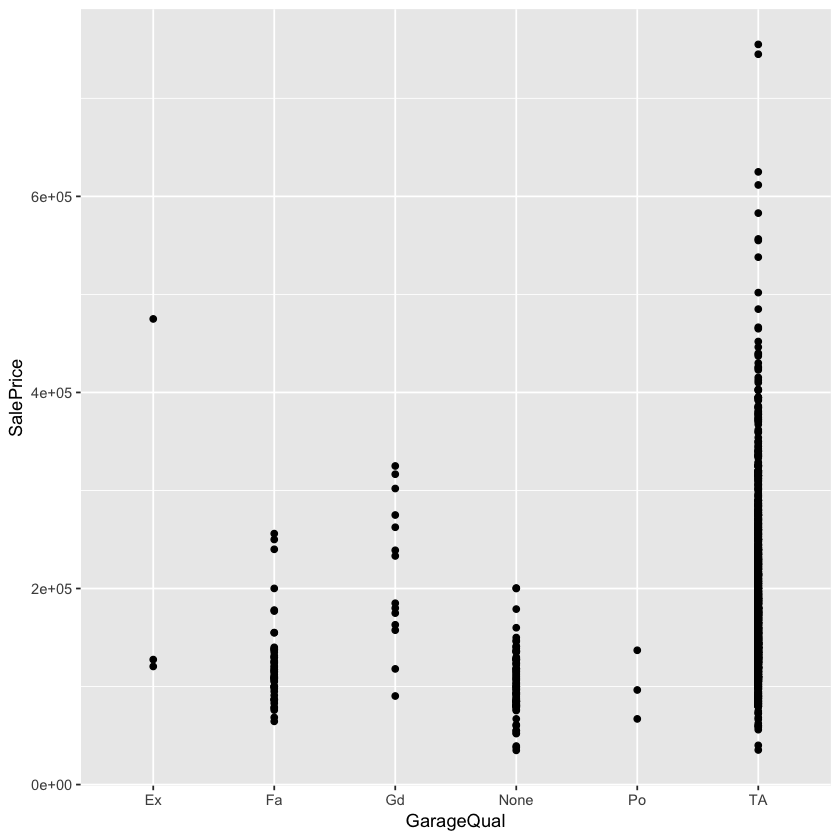

In [124]:
ggplot(house.price.train, aes(GarageQual, SalePrice)) + geom_point()

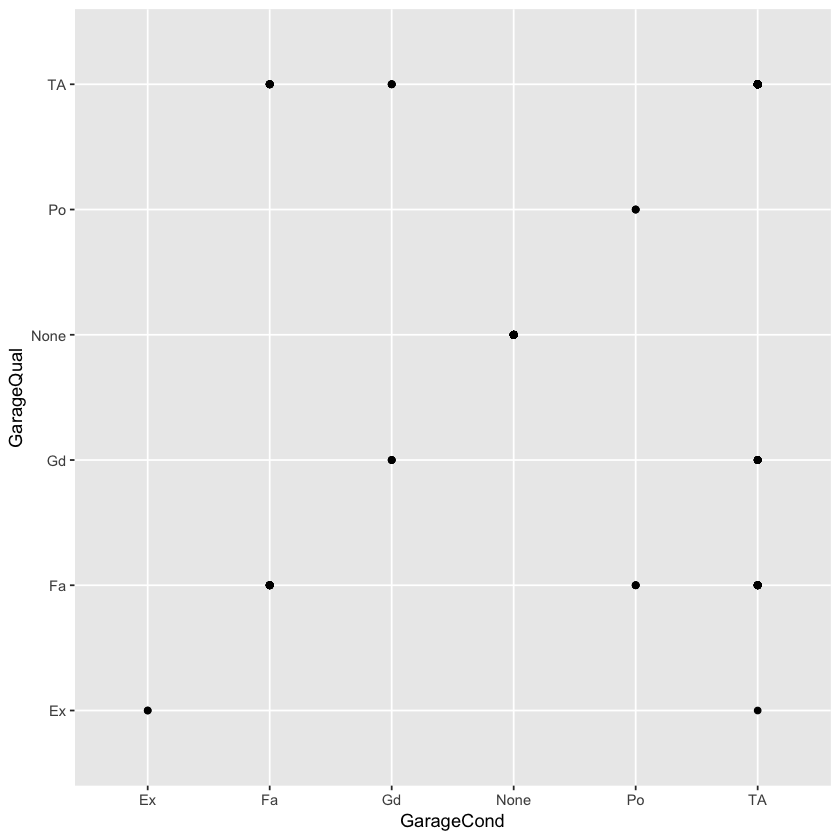

In [125]:
ggplot(house.price.train, aes(GarageCond, GarageQual)) + geom_point()

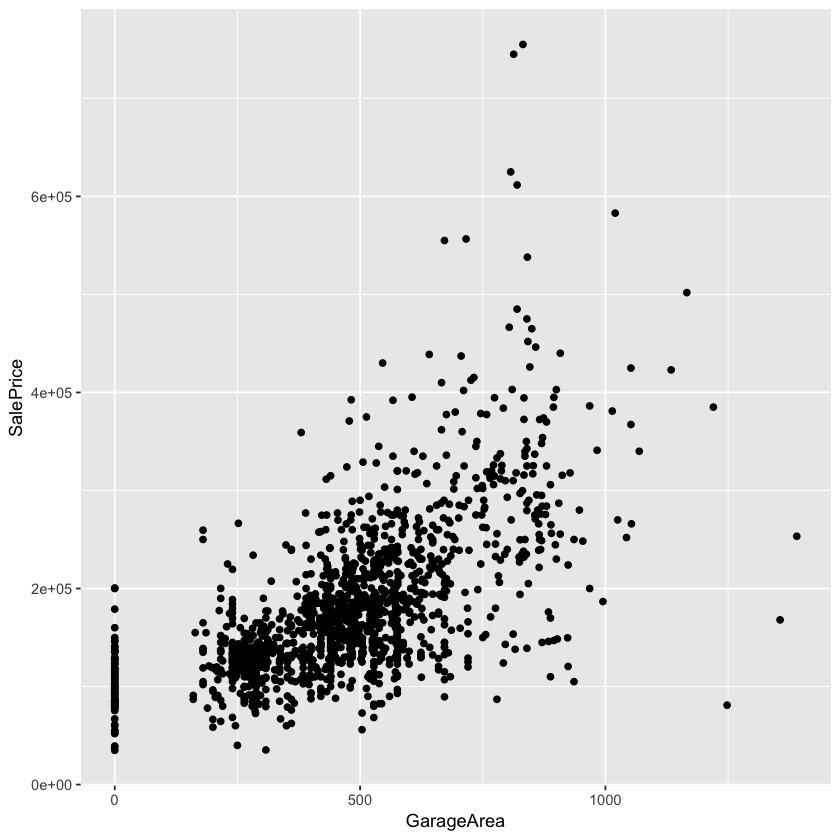

In [126]:
ggplot(house.price.train, aes(GarageArea, SalePrice)) + geom_point()

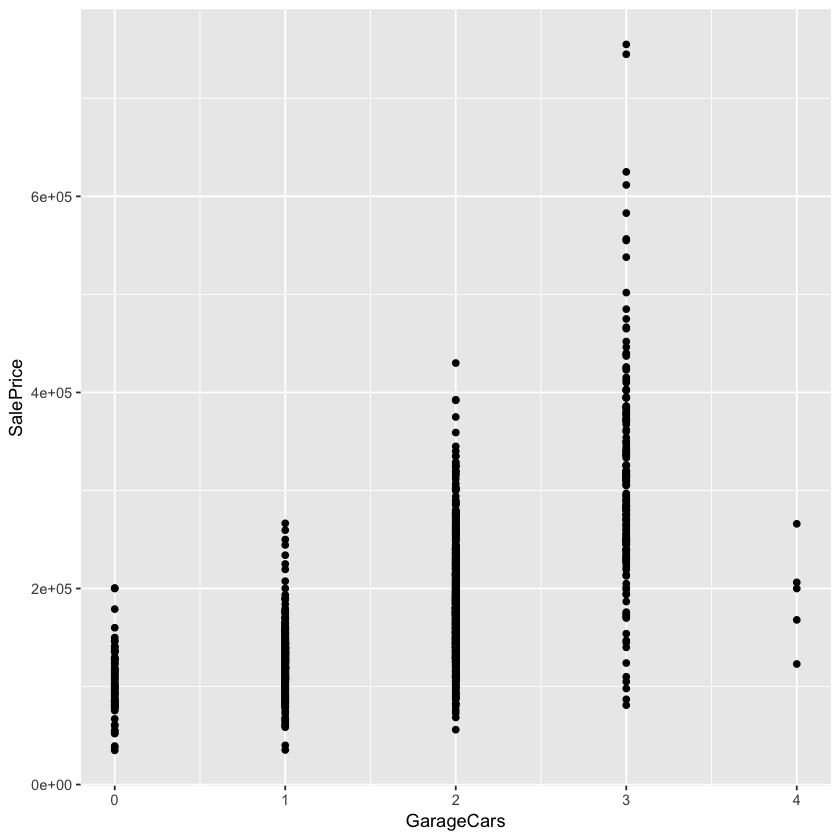

In [127]:
ggplot(house.price.train, aes(GarageCars, SalePrice)) + geom_point()

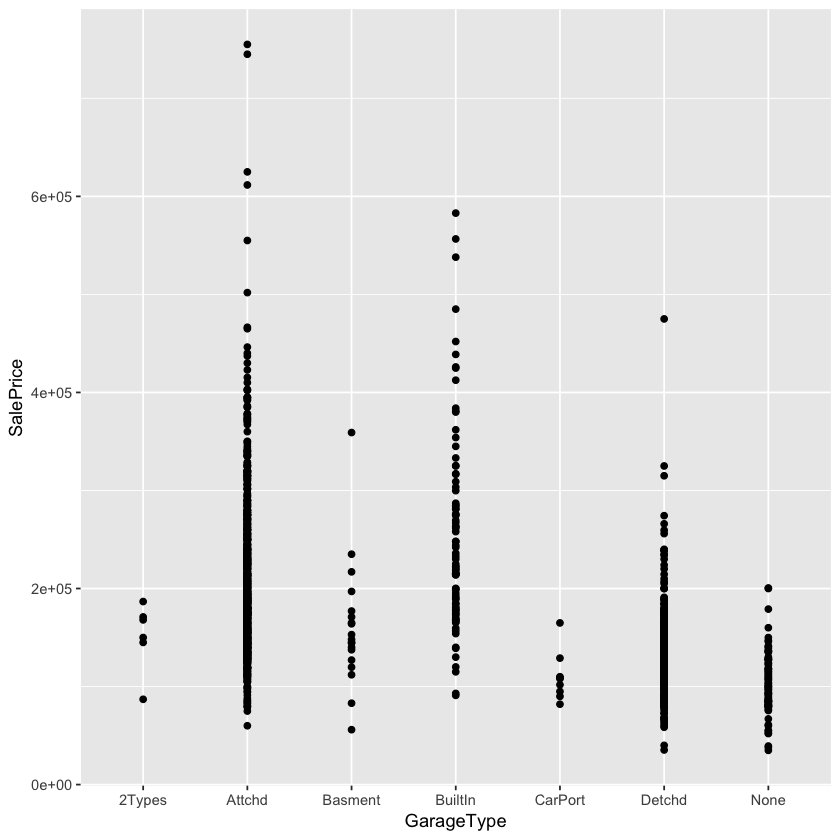

In [128]:
ggplot(house.price.train, aes(GarageType, SalePrice)) + geom_point()

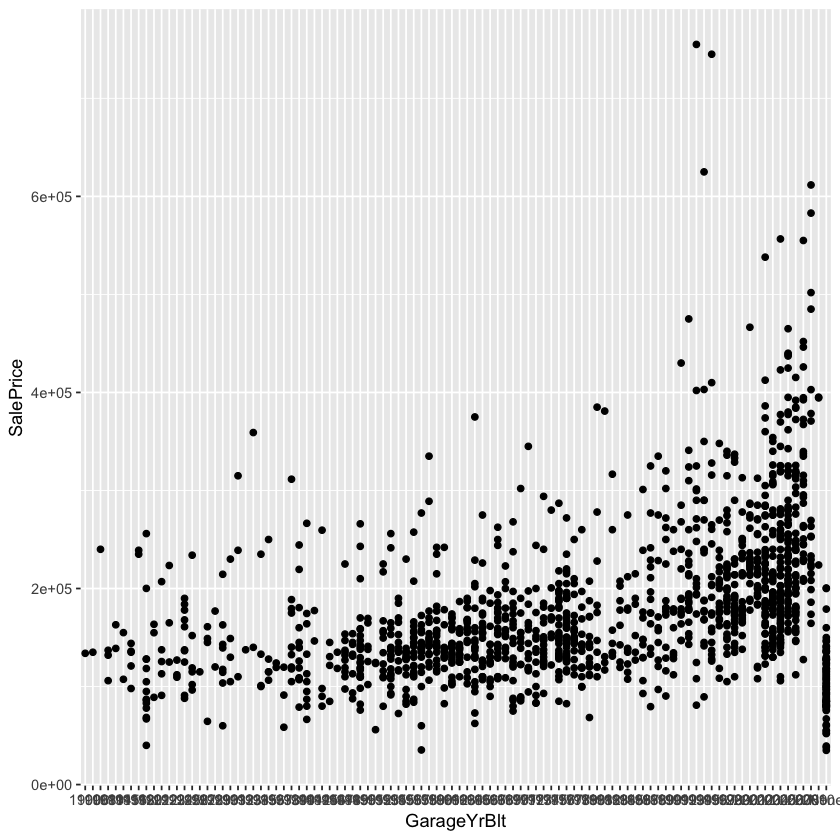

In [130]:
ggplot(house.price.train, aes(GarageYrBlt, SalePrice)) + geom_point()

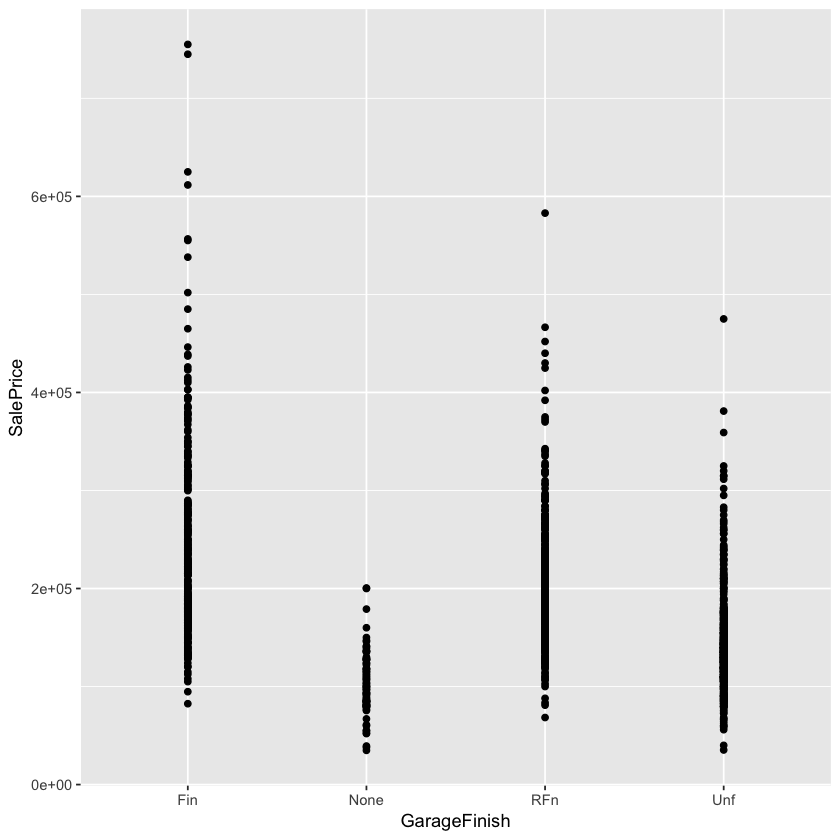

In [131]:
ggplot(house.price.train, aes(GarageFinish, SalePrice)) + geom_point()

In [132]:
model7 <- lm(LogPriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + X1stFlrSF + GarageArea, data = house.price.train)
summary(model7)   # adding garage area doesn't increase R square


Call:
lm(formula = LogPriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + 
    X1stFlrSF + GarageArea, data = house.price.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97498 -0.07721  0.01285  0.08894  0.54827 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.319e+00  3.646e-01  14.588  < 2e-16 ***
OverallQual       9.226e-02  4.703e-03  19.619  < 2e-16 ***
GrLivArea         2.735e-04  1.321e-05  20.709  < 2e-16 ***
GarageCars        3.840e-02  1.249e-02   3.075  0.00214 ** 
YearBuilt         2.747e-03  1.917e-04  14.330  < 2e-16 ***
GarageArea        1.209e-04  4.208e-05   2.872  0.00413 ** 
FullBath         -2.819e-02  1.074e-02  -2.625  0.00875 ** 
TotalBsmtSF       1.420e-04  1.781e-05   7.976 3.05e-15 ***
PorchDeckAreaNew  2.941e-04  4.446e-05   6.614 5.23e-11 ***
X1stFlrSF         4.292e-05  1.995e-05   2.151  0.03164 *  
---
Signif. c


Call:
lm(formula = SalePrice ~ GarageFinish2, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-161485  -38448  -10302   25044  511015 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      96897       3767   25.72   <2e-16 ***
GarageFinish2    49029       1950   25.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66400 on 1456 degrees of freedom
Multiple R-squared:  0.3028,	Adjusted R-squared:  0.3023 
F-statistic: 632.3 on 1 and 1456 DF,  p-value: < 2.2e-16


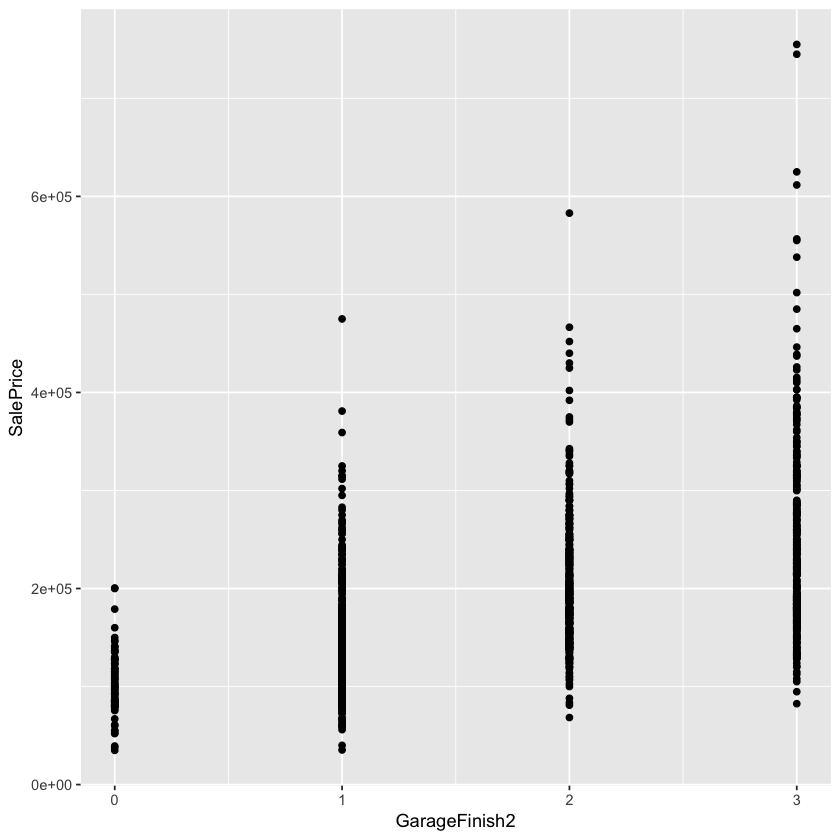

In [133]:
house.price.train$GarageFinish2 = house.price.train$GarageFinish
house.price.train$GarageFinish2[house.price.train$GarageFinish2=="Fin"] <- 3
house.price.train$GarageFinish2[house.price.train$GarageFinish2=="RFn"] <- 2
house.price.train$GarageFinish2[house.price.train$GarageFinish2=="Unf"] <- 1
house.price.train$GarageFinish2[house.price.train$GarageFinish2=="None"] <- 0
house.price.train$GarageFinish2 <- as.numeric(as.character(house.price.train$GarageFinish2))
model.GarageFinish2 <- lm(SalePrice~GarageFinish2, data=house.price.train)
summary(model.GarageFinish2)
ggplot(house.price.train, aes(GarageFinish2, SalePrice)) + geom_point()

In [134]:
model8 <- lm(LogPriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + X1stFlrSF + GarageArea + GarageFinish2, data = house.price.train)
summary(model8)   # adding garage finish numerical


Call:
lm(formula = LogPriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + 
    X1stFlrSF + GarageArea + GarageFinish2, data = house.price.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95428 -0.07368  0.01232  0.08636  0.55785 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.982e+00  3.828e-01  15.625  < 2e-16 ***
OverallQual       8.914e-02  4.698e-03  18.972  < 2e-16 ***
GrLivArea         2.706e-04  1.310e-05  20.657  < 2e-16 ***
GarageCars        2.692e-02  1.257e-02   2.142  0.03236 *  
YearBuilt         2.404e-03  2.009e-04  11.967  < 2e-16 ***
GarageArea        1.265e-04  4.172e-05   3.033  0.00246 ** 
FullBath         -2.716e-02  1.064e-02  -2.552  0.01082 *  
TotalBsmtSF       1.429e-04  1.765e-05   8.096 1.20e-15 ***
PorchDeckAreaNew  2.744e-04  4.422e-05   6.205 7.11e-10 ***
X1stFlrSF         4.152e-05  1.978e-05   2.099  0.03595 *

In [135]:
model.GarageYrBlt <- lm(SalePrice~GarageYrBlt, data=house.price.train)
summary(model.GarageYrBlt)


Call:
lm(formula = SalePrice ~ GarageYrBlt, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-184304  -34638   -8349   22084  509418 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)     133900.0    63951.3   2.094  0.03646 * 
GarageYrBlt1906   1100.0    90440.7   0.012  0.99030   
GarageYrBlt1908 106100.0    90440.7   1.173  0.24094   
GarageYrBlt1910  -8900.0    73844.6  -0.121  0.90409   
GarageYrBlt1914  17043.5    78324.0   0.218  0.82777   
GarageYrBlt1915  -2700.0    78324.0  -0.034  0.97251   
GarageYrBlt1916  -7100.0    70055.1  -0.101  0.91929   
GarageYrBlt1918 103100.0    78324.0   1.316  0.18829   
GarageYrBlt1920 -23907.1    66195.8  -0.361  0.71804   
GarageYrBlt1921   1900.0    73844.6   0.026  0.97948   
GarageYrBlt1922    900.0    70055.1   0.013  0.98975   
GarageYrBlt1923  37266.7    73844.6   0.505  0.61388   
GarageYrBlt1924 -17733.3    73844.6  -0.240  0.81025   
GarageYrBlt1925  11990.0    67072.6 

In [136]:
model9 <- lm(LogPriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + X1stFlrSF + GarageArea + GarageFinish2 + GarageYrBlt, data = house.price.train)
summary(model9)   # adding garage year built


Call:
lm(formula = LogPriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + 
    X1stFlrSF + GarageArea + GarageFinish2 + GarageYrBlt, data = house.price.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93023 -0.07241  0.01004  0.08470  0.58584 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.068e+00  5.072e-01   9.992  < 2e-16 ***
OverallQual       8.582e-02  5.158e-03  16.638  < 2e-16 ***
GrLivArea         2.652e-04  1.365e-05  19.431  < 2e-16 ***
GarageCars        2.063e-02  1.333e-02   1.547  0.12204    
YearBuilt         2.753e-03  2.568e-04  10.719  < 2e-16 ***
GarageArea        1.380e-04  4.447e-05   3.104  0.00195 ** 
FullBath         -9.299e-03  1.128e-02  -0.824  0.41007    
TotalBsmtSF       1.459e-04  1.787e-05   8.164 7.37e-16 ***
PorchDeckAreaNew  2.927e-04  4.460e-05   6.563 7.51e-11 ***
X1stFlrSF         3.315e-05  2.063e-05   1.


Call:
lm(formula = SalePrice ~ GarageYrBlt2, data = house.price.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-141848  -41132  -13755   22297  547104 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2858246.6   134804.9  -21.20   <2e-16 ***
GarageYrBlt2     1537.7       68.2   22.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 68460 on 1456 degrees of freedom
Multiple R-squared:  0.2588,	Adjusted R-squared:  0.2583 
F-statistic: 508.4 on 1 and 1456 DF,  p-value: < 2.2e-16


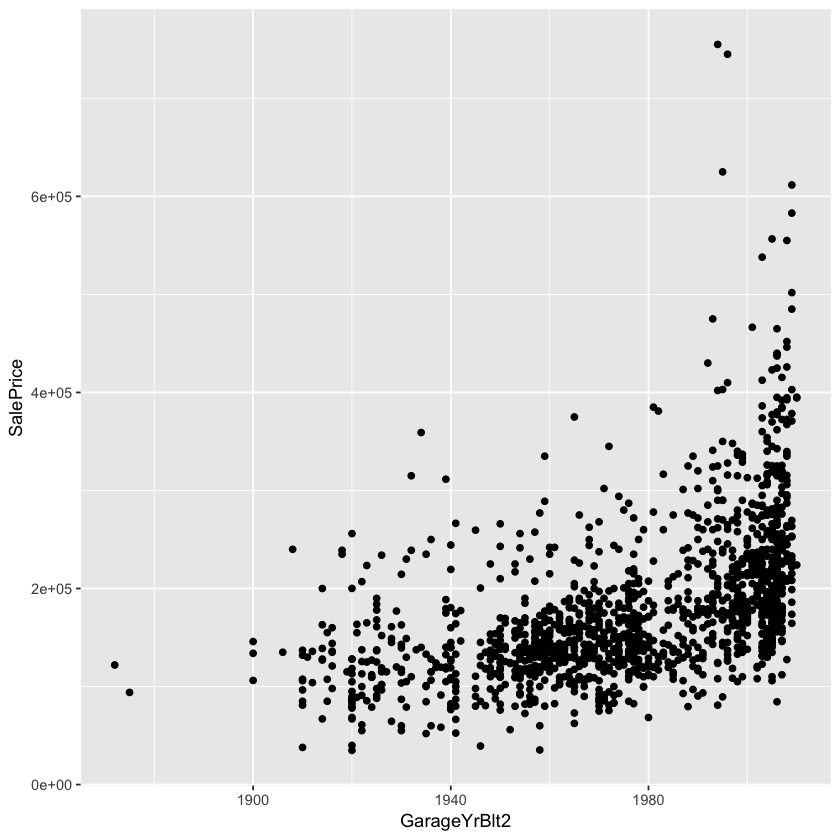

In [137]:
house.price.train$GarageYrBlt2 = house.price.train$GarageYrBlt
house.price.train$GarageYrBlt2[house.price.train$GarageYrBlt2=="None"] <- house.price.train$YearBuilt[house.price.train$GarageYrBlt2=="None"] 
house.price.train$GarageYrBlt2 <- as.numeric(as.character(house.price.train$GarageYrBlt2))
model.GarageYrBlt2 <- lm(SalePrice~GarageYrBlt2, data=house.price.train)
summary(model.GarageYrBlt2)
ggplot(house.price.train, aes(GarageYrBlt2, SalePrice)) + geom_point()

In [138]:
model10 <- lm(LogPriceMinusMisc ~ OverallQual + GrLivArea+ GarageCars + YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + X1stFlrSF + GarageArea + GarageFinish2 + GarageYrBlt2, data = house.price.train)
summary(model10)   # adding garage year built numerial + None estimated by house year built  # not include this variable


Call:
lm(formula = LogPriceMinusMisc ~ OverallQual + GrLivArea + GarageCars + 
    YearBuilt + GarageArea + FullBath + TotalBsmtSF + PorchDeckAreaNew + 
    X1stFlrSF + GarageArea + GarageFinish2 + GarageYrBlt2, data = house.price.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95621 -0.07448  0.01241  0.08605  0.55866 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.119e+00  4.566e-01  13.403  < 2e-16 ***
OverallQual       8.925e-02  4.704e-03  18.974  < 2e-16 ***
GrLivArea         2.700e-04  1.315e-05  20.538  < 2e-16 ***
GarageCars        2.693e-02  1.257e-02   2.142  0.03233 *  
YearBuilt         2.509e-03  2.767e-04   9.068  < 2e-16 ***
GarageArea        1.328e-04  4.325e-05   3.071  0.00217 ** 
FullBath         -2.656e-02  1.070e-02  -2.482  0.01317 *  
TotalBsmtSF       1.423e-04  1.768e-05   8.051 1.71e-15 ***
PorchDeckAreaNew  2.748e-04  4.424e-05   6.213 6.77e-10 ***
X1stFlrSF         4.097e-05  1.981e-05   2

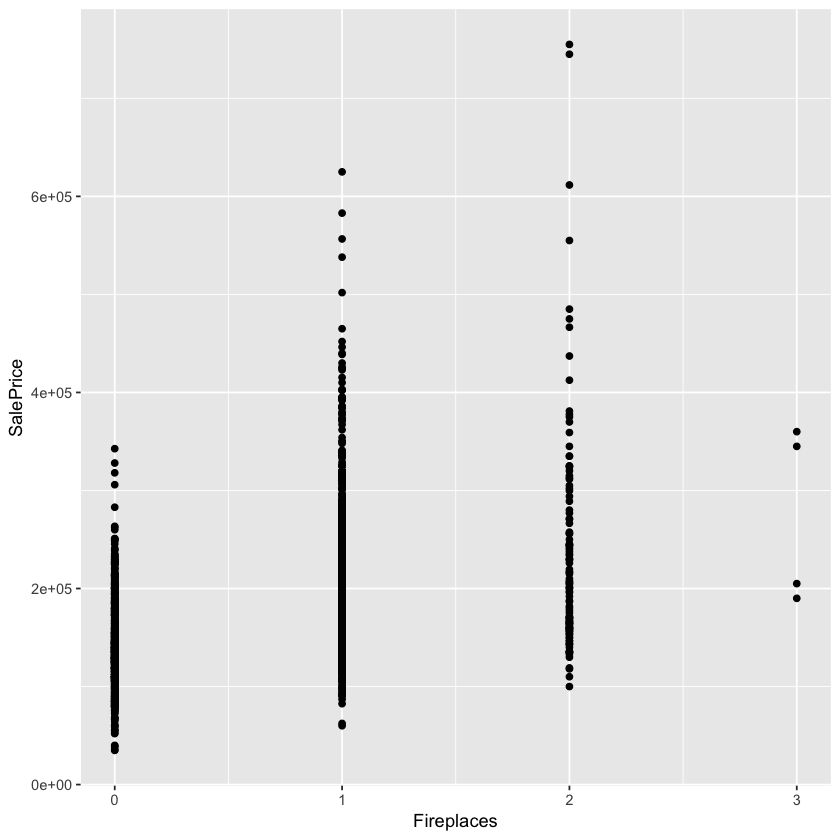

In [139]:
ggplot(house.price.train, aes(Fireplaces, SalePrice)) + geom_point()

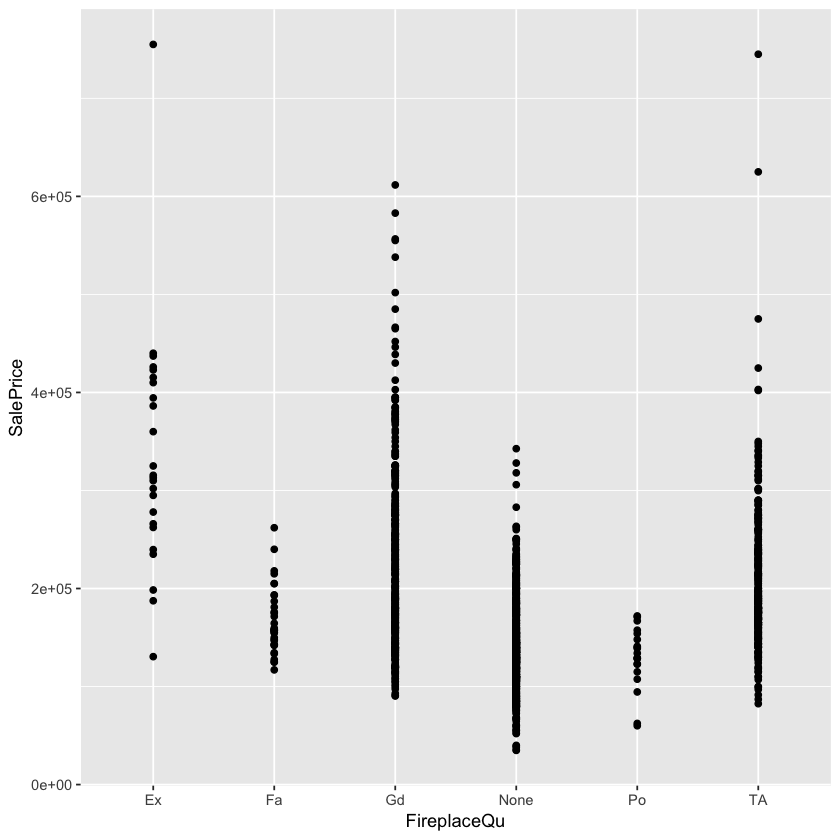

In [140]:
ggplot(house.price.train, aes(FireplaceQu, SalePrice)) + geom_point()

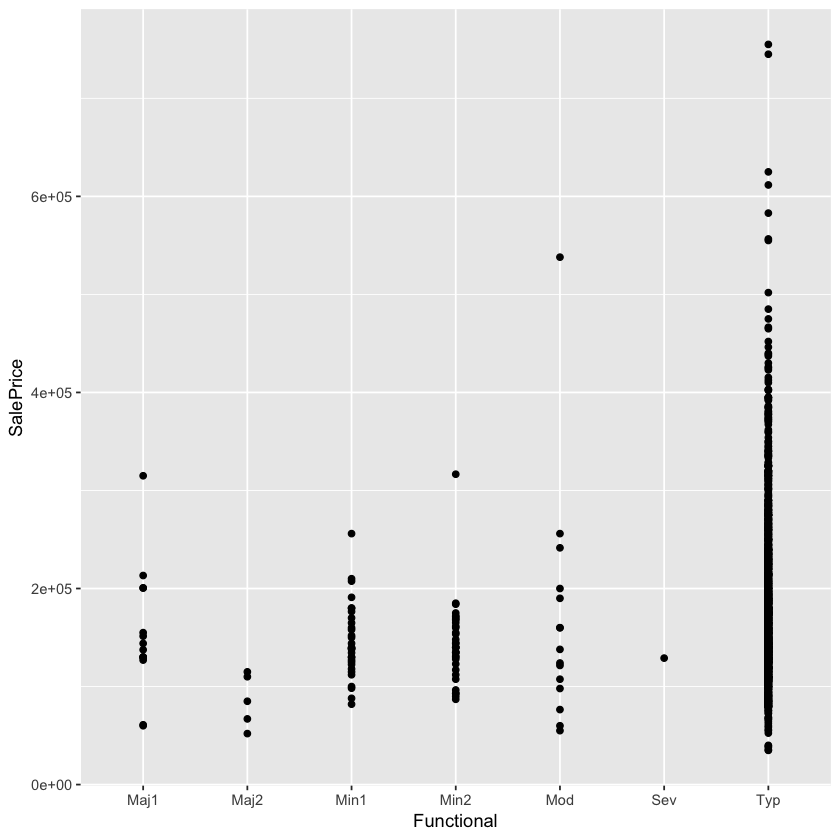

In [142]:
ggplot(house.price.train, aes(Functional, SalePrice)) + geom_point()